In [1]:
%matplotlib inline


# import needed libraries
import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot


Need to read in our data (data is CSV file)

In [2]:
data = pd.read_csv(r"C:\Users\johnl\Documents\Titanic Data\train.csv")
#overview of data 
print(data.shape)
#rows = 891
#cols = 12
# view our data format
data.head(5)


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our target is survived ( i.e the variable we must predict)
If Survived = 1, the Passenger is alive
If Survived = 0, the Passenger is dead

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Overview of Data
* **PassengerId** is the unique id of the row and it doesn't have any effect on target


* **Survived** is the target variable we are trying to predict (0 or 1): <br>
   1 = Survived\
   0 = Not Survived


* **Pclass** (Passenger Class) is the socio-economic status of the passenger and it is categorical data which has 3 unique values (1, 2 or 3):<br>
    1 = Upper Class\
    2 = Middle Class\
    3 = Lower Class


* **Name**, **Sex** and **Age** are obvious


* **SibSp** is the total number of the passengers' siblings and spouse


* **Parch** is the total number of the passengers' parents and children


* **Ticket** is the ticket number of the passenger


* **Fare** is the passenger fare


* **Cabin** is the cabin number of the passenger


* **Embarked** is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):<br>
    C = Cherbourg\
    Q = Queenstown\
    S = Southampton

Age is missing 177 entries. 
How to fill null values?
Median, Mode or Mean?
Mean is more prone to outliers (i.e very young children or very elderly people thus might skew our present data)
Median is the safest and most reliable.

In [4]:
# FILL null values for age with median 

data['Age'] = data['Age'].fillna(data['Age'].median())


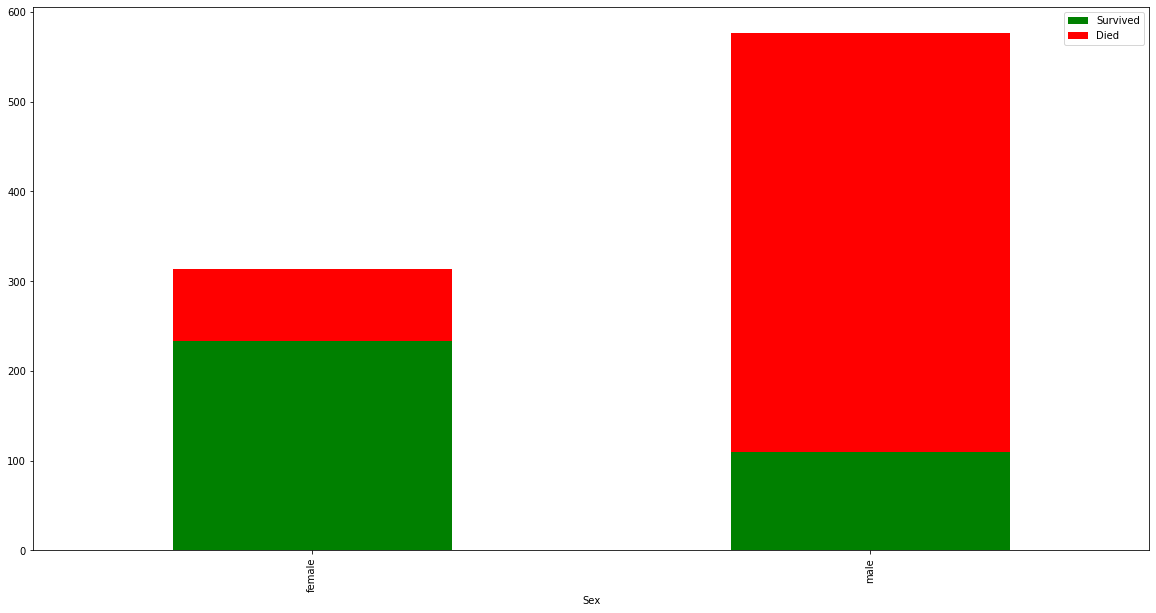

In [5]:

data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(20, 10),
                                                          stacked=True, color=['g', 'r']);

From this plot it seems the majority of passangers were male and males were much more likely to die than females

C:\Users\johnl\Anaconda\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


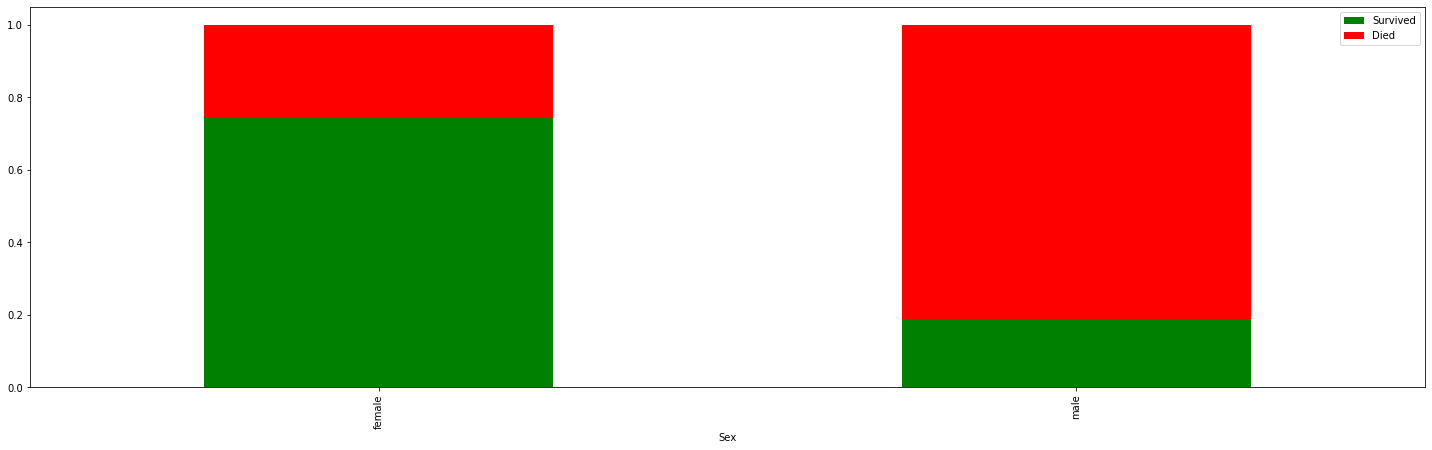

In [6]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=['g', 'r']);

From this we see that sex played a huge factor in whether someone survived or died with near inverse porportions

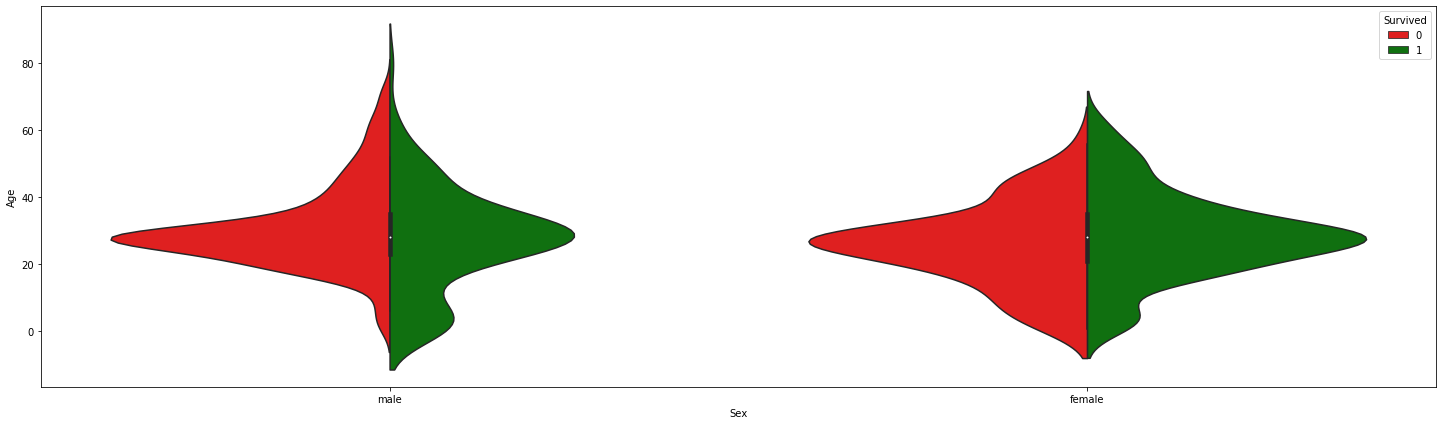

In [7]:
fig = plt.figure(figsize=(25, 7))
#A Violin Plot is used to visualise the distribution of the data and its probability density. 
#This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, 
#to show the distribution shape of the data.
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

Important takeaways from violin plot (x = **Sex**, y = **Age**)

* Women survive more than men, as depicted by the larger female green histogram


* The age conditions the survival for male passengers: <br>
    * Younger male tend to survive
    * A large number of passengers between 20 and 40 succumb
    * The age doesn't seem to have a direct impact on the female survival

Another important factor to consider is the fare ticket, was there a socio economic bias in the survival rate?


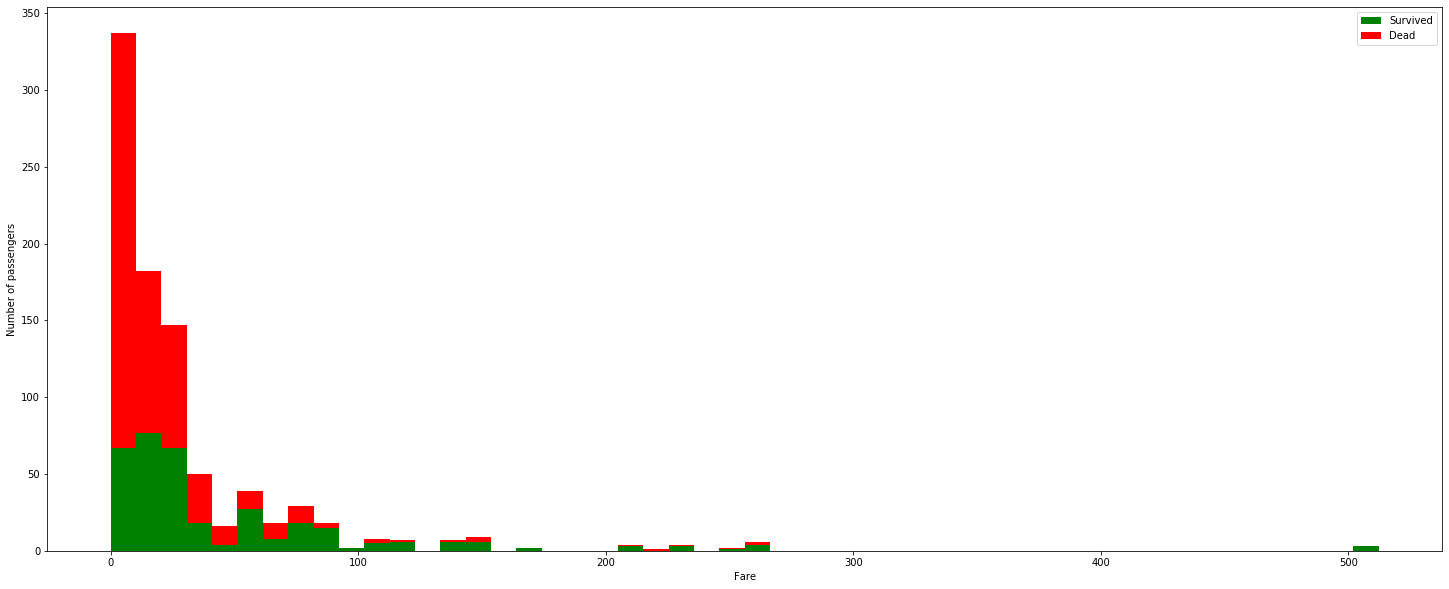

In [8]:
'''
data["Survived"]==1["Fare"]
- gets the fare for people who survived
'''
figure = plt.figure(figsize=(25, 10))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

##### Important takeaways from this plot
Passengers with cheaper ticket fares are more likely to die. Conversely passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.
Thus there seems to be a direct relationship with wealth and survival 


Text(0, 0.5, 'Fare')

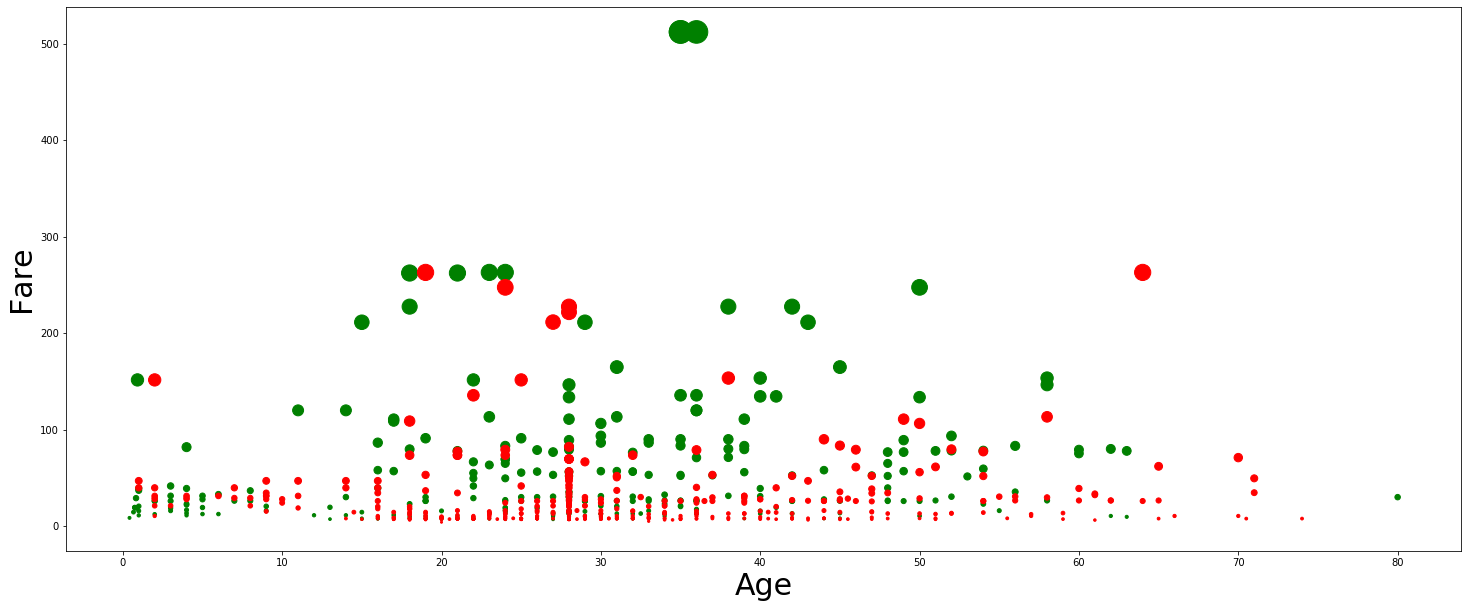

In [9]:
plt.figure(figsize = (25,10))
scat = plt.subplot()
scat.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'],
            c = "g", s = data[data['Survived']==1]['Fare'])
scat.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);
plt.xlabel('Age',fontsize=30)
plt.ylabel('Fare',fontsize=30)

The size of the circles is proportional to the ticket fare.

On the x-axis, we have the ages and the y-axis, we consider the ticket fare.

We can observe different clusters:

Large green dots between x=20 and x=45: adults with the largest ticket fares
Small red dots between x=10 and x=45, adults from lower classes on the boat
Small greed dots between x=0 and x=7: these are the children that were saved

As we can see there seems to be a distinct seperation between the fare prices, the cheaper tickets have a strong correlation with death while the more price increases it seems the more likely a passanger was to survive, an exception to this is the cluster of cheap fare tickets between x = 0 and x = 7 , which lends itself to the idea that young children were recused first despite their fare price.

We will now examine the site of departure and its affect on survival

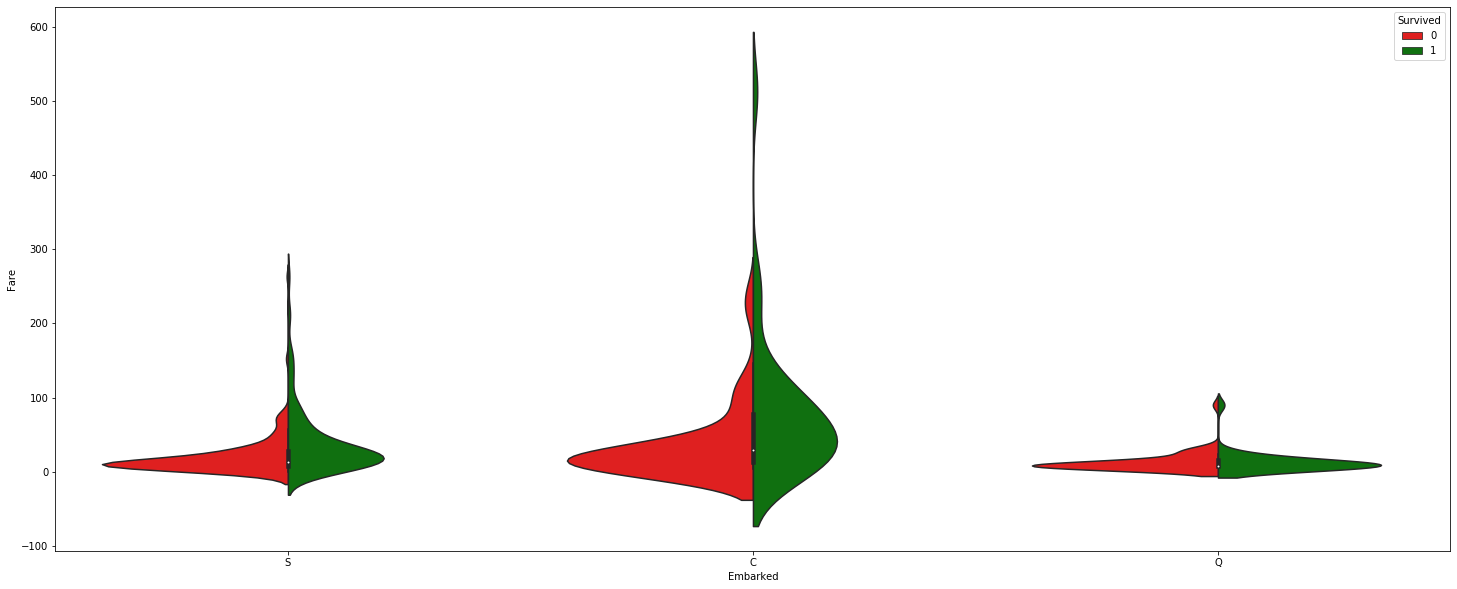

In [10]:
fig = plt.figure(figsize=(25, 10))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

### Feature Engineering

In [11]:
'''
Print function to assert whether or not a feature has been processed
'''
def status(feature):
    print('Processing', feature, ': ok')

In [12]:

def get_combined_data():
    train = pd.read_csv(r"C:\Users\johnl\Documents\Titanic Data\train.csv")
    test = pd.read_csv(r"C:\Users\johnl\Documents\Titanic Data\test.csv")
    # extract and remove the target from the training data
    targets = train.Survived # survived is a column 
    train.drop(["Survived"],1,inplace = True) # we want top estimate it so we drop 
    
    #merging train data and test data for feature engineering
    # remove PassengerID as its not useful 
    combined = train.append(test)
    combined.reset_index(inplace = True)
    combined.drop(['index', 'PassengerId'], inplace = True, axis = 1)
    return combined
combined = get_combined_data()
print(combined.shape)
combined.head()

test = pd.read_csv(r"C:\Users\johnl\Documents\Titanic Data\test.csv")


(1309, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titles = []
for name in data['Name']:
    x = (name.split(',')[1].split('.')[0].strip())
    if x not in titles:
        titles.append(x)
        

print(titles)
# set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


In [14]:
combined = get_titles()
combined.head()

Processing Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [15]:
#.iloc[] is primarily integer position based (from 0 to length-1 of the axis),
#but may also be used with a boolean array.
# groupby function groups in order, so it will group to men and women
# then it will group into each class
grouped_train = combined.iloc[:891].groupby(['Sex', 'Pclass','Title'])
grouped_train_median =grouped_train.median()
grouped_median_train = grouped_train_median.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
print(grouped_median_train)



       Sex  Pclass    Title   Age
0   female       1     Miss  30.0
1   female       1      Mrs  40.0
2   female       1  Officer  49.0
3   female       1  Royalty  40.5
4   female       2     Miss  24.0
5   female       2      Mrs  31.5
6   female       3     Miss  18.0
7   female       3      Mrs  31.0
8     male       1   Master   4.0
9     male       1       Mr  40.0
10    male       1  Officer  51.0
11    male       1  Royalty  40.0
12    male       2   Master   1.0
13    male       2       Mr  31.0
14    male       2  Officer  46.5
15    male       3   Master   4.0
16    male       3       Mr  26.0


In [16]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    
    return grouped_median_train[condition]['Age'].values[0]

#The apply() function is used to apply a function along an axis of the DataFrame.
def process_age():
    global combined
    combined["Age"] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age'])else row['Age'],axis=1)
    return combined

combined = process_age()


In [17]:
#axis{0 or ‘index’, 1 or ‘columns’}, default 0
#Whether to drop labels from the index (0 or ‘index’) or 
#columns (1 or ‘columns’).

#inplace bool, default False
#If False, return a copy. Otherwise, do operation inplace and return None.

#The get_dummies() function is used to 
    #convert categorical variable into dummy/indicator variables.
def process_names():
    global combined
    combined.drop('Name', axis = 1, inplace = True)
    
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
   
    return combined

combined = process_names()
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [18]:
def process_embarked():
    global combined
    combined.Embarked.fillna("S", inplace = True)
    embarked_dummies = pd.get_dummies(combined["Embarked"], prefix = "Embarked")
    combined =pd.concat([combined, embarked_dummies],axis = 1)
    # dont need embarked now
    combined.drop("Embarked",axis = 1, inplace= True)
    return combined

combined = process_embarked()
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [19]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

print(train_cabin)
# set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'U', 'T'])

print(test_cabin)

def process_cabin():
    global combined
    combined.Cabin.fillna("U", inplace = True)
    combined["Cabin"] = combined["Cabin"].map(lambda c: c[0])
    cabin_dummies = pd.get_dummies(combined["Cabin"], prefix = "Cabin")
    combined = pd.concat([combined, cabin_dummies], axis = 1)
    combined.drop("Cabin", axis = 1, inplace = True)
    status("Cabin")
    return combined

combined = process_cabin()
combined.head()
    

{'D', 'U', 'F', 'B', 'A', 'G', 'T', 'E', 'C'}
{'D', 'U', 'F', 'B', 'A', 'G', 'E', 'C'}
Processing Cabin : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [20]:
def process_sex():
    global combined
    #just simply converting it to binary 
    combined["Sex"]= combined["Sex"].map({"male":1, "female":0})
    status("sex")
    return combined

combined = process_sex()
combined.head()

Processing sex : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [21]:
# have no null values
def process_pclass():
    global combined
    pclass_dummies = pd.get_dummies(combined["Pclass"], prefix = "Pclass")
    combined = pd.concat([combined, pclass_dummies],axis =1)
    combined.drop("Pclass", axis =1, inplace = True)
    status("Pclass")
    return combined
    
combined = process_pclass()
combined.head()

Processing Pclass : ok


,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [22]:

def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    
    ticket = ticket.replace('/', '')
    
    ticket = ticket.split()
   
    # map the function strip onto the ticket
    ticket = map(lambda t : t.strip(), ticket)

    # filter out digits
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    
    # if there is something in the list then we have a ticket
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'
    
tickets = set()
for i in combined["Ticket"]:
    tickets.add(cleanTicket(i))
print(len(tickets))

37


In [23]:
def process_ticket():
    global combined
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.', '')

        ticket = ticket.replace('/', '')

        ticket = ticket.split()

        # map the function strip onto the ticket
        ticket = map(lambda t : t.strip(), ticket)

        # filter out digits
        ticket = list(filter(lambda t : not t.isdigit(), ticket))

        # if there is something in the list then we have a ticket
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    
    combined["Ticket"] = combined["Ticket"].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    status('Ticket')
    return combined

combined = process_ticket()
combined.head()

Processing Ticket : ok


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
#FamilySize : the total number of relatives including the passenger (him/her)self.
#Sigleton : a boolean variable that describes families of size = 1
#SmallFamily : a boolean variable that describes families of 2 <= size <= 4
#LargeFamily : a boolean variable that describes families of 5 < size

def process_family():
    global combined
    combined["FamilySize"] = combined["Parch"] + combined["SibSp"]+1
    combined["Single"] = combined["FamilySize"].map(lambda x: 1 if x==1 else 0 )
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status("family")
    return combined
combined = process_family()
combined.head()

Processing family : ok


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Single,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


# Modeling

#### Break the combined dataset in train set and test set. <br>
#### Use the train set to build a predictive model. <br>
#### Evaluate the model using the train set.<br>
#### Test the model using the test set and generate and output file for the submission.<br>

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [26]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [27]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv(r"C:\Users\johnl\Documents\Titanic Data\train.csv", usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

train, test, targets = recover_train_test_target()

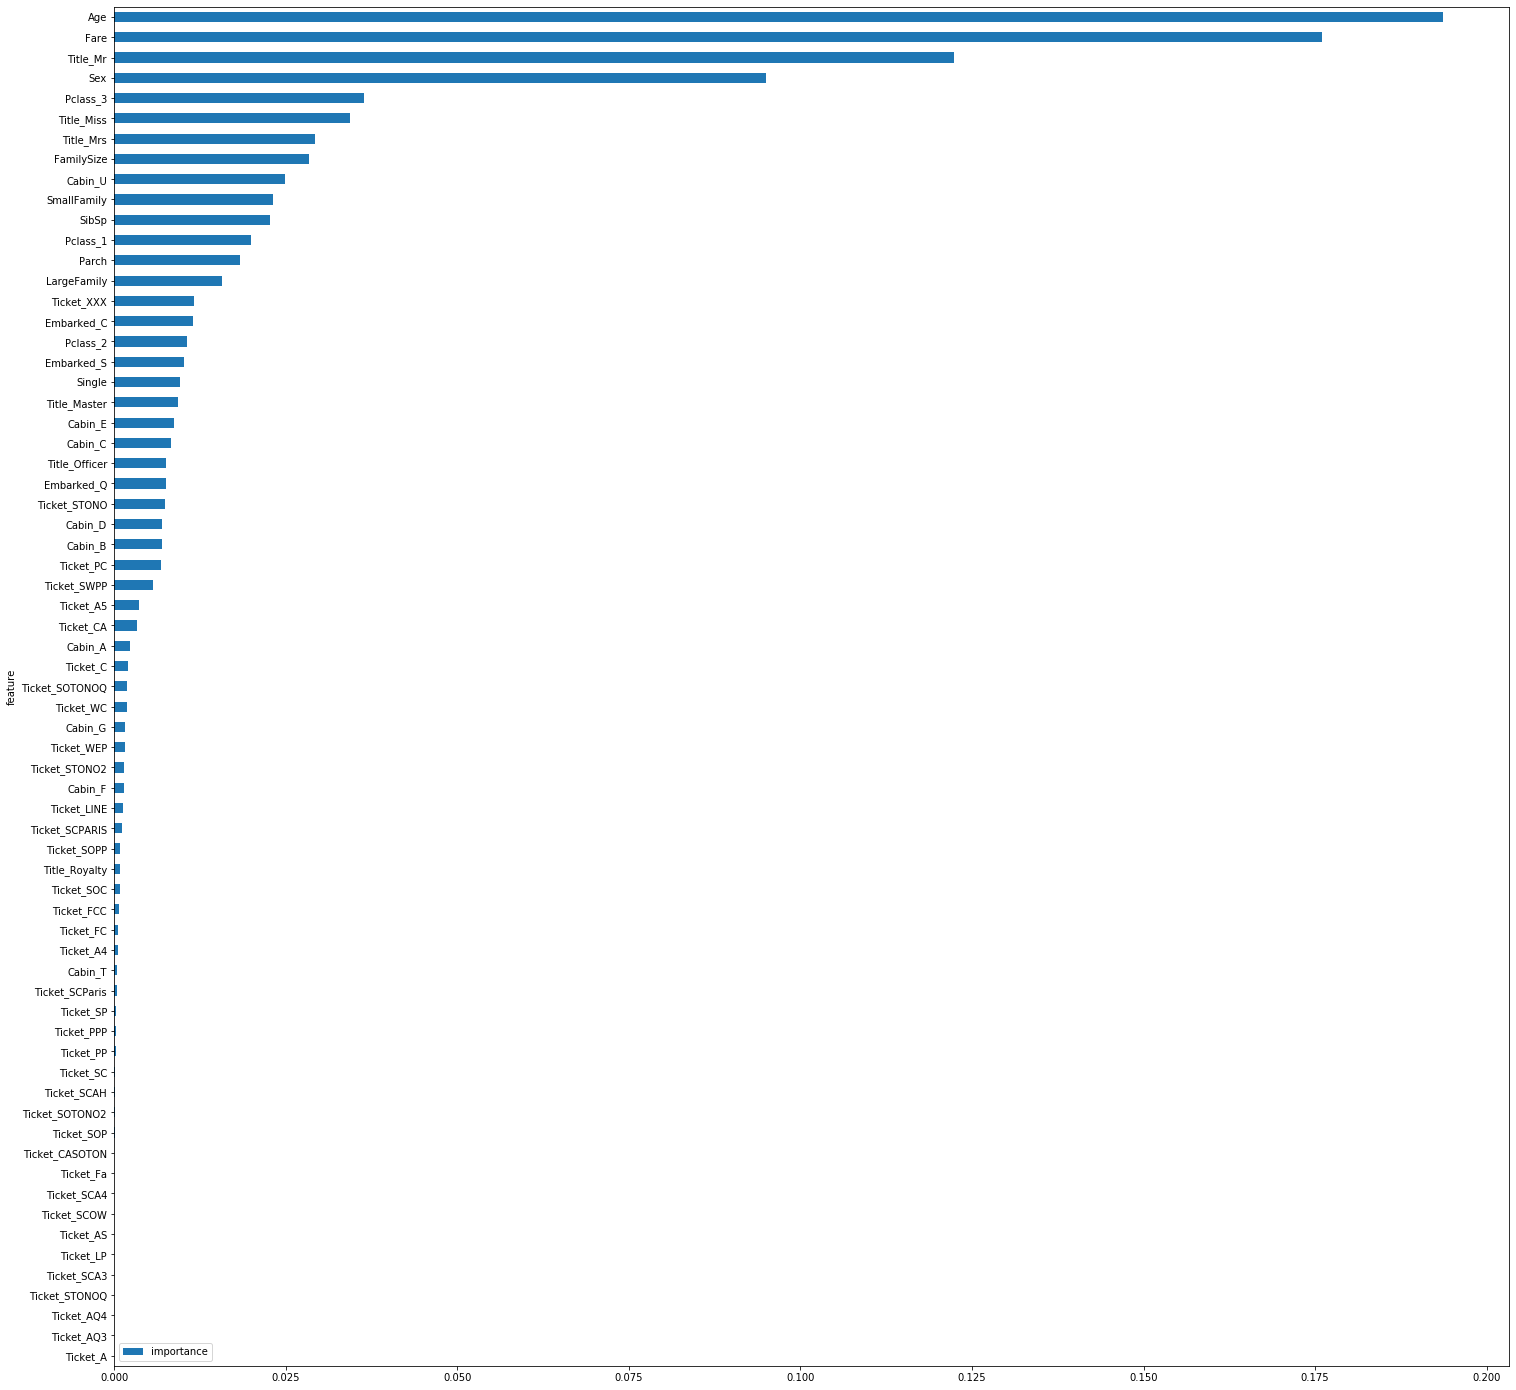

In [29]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)


features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [42]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)
train_reduced
test.fillna(train.mean(), inplace=True)
model = SelectFromModel(clf, prefit=True)
test_reduced = model.transform(test)


(891, 14)


C:\Users\johnl\Anaconda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

CV score = 0.8125769783320514
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

CV score = 0.8249241166088076
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.808126677653312
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CV score = 0.8249176976842577
****


In [44]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [48]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv(r"C:\Users\johnl\Documents\Titanic Data\test.csv")
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv(r"C:\Users\johnl\Documents\Titanic Data\Predictions.csv", index=False)